In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matrix = pd.read_csv('../Data/feature_matrix.csv', index_col = 0)

In [3]:
matrix = matrix.dropna()

In [4]:
# matrix.to_csv('../Data/feature_matrix.csv')

Text(0.5, 1.0, 'Correlation Matrix')

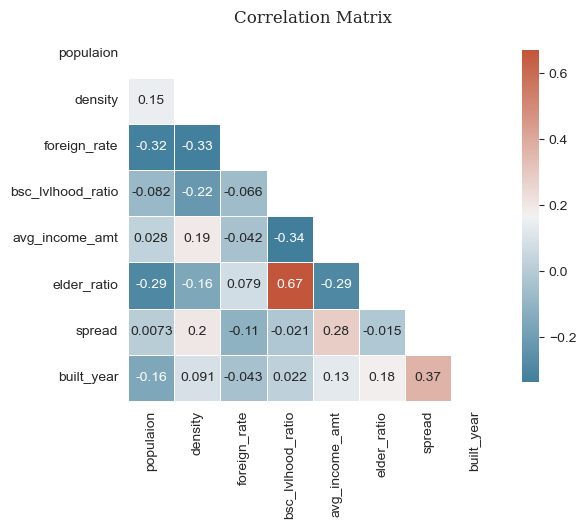

In [5]:
import seaborn as sns
from matplotlib import font_manager, rc

mask = np.triu(np.ones_like(matrix.iloc[:,:-1].corr(), dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.iloc[:,:-1].corr(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)
plt.title('Correlation Matrix', fontsize = 12, fontfamily = 'Serif')

/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


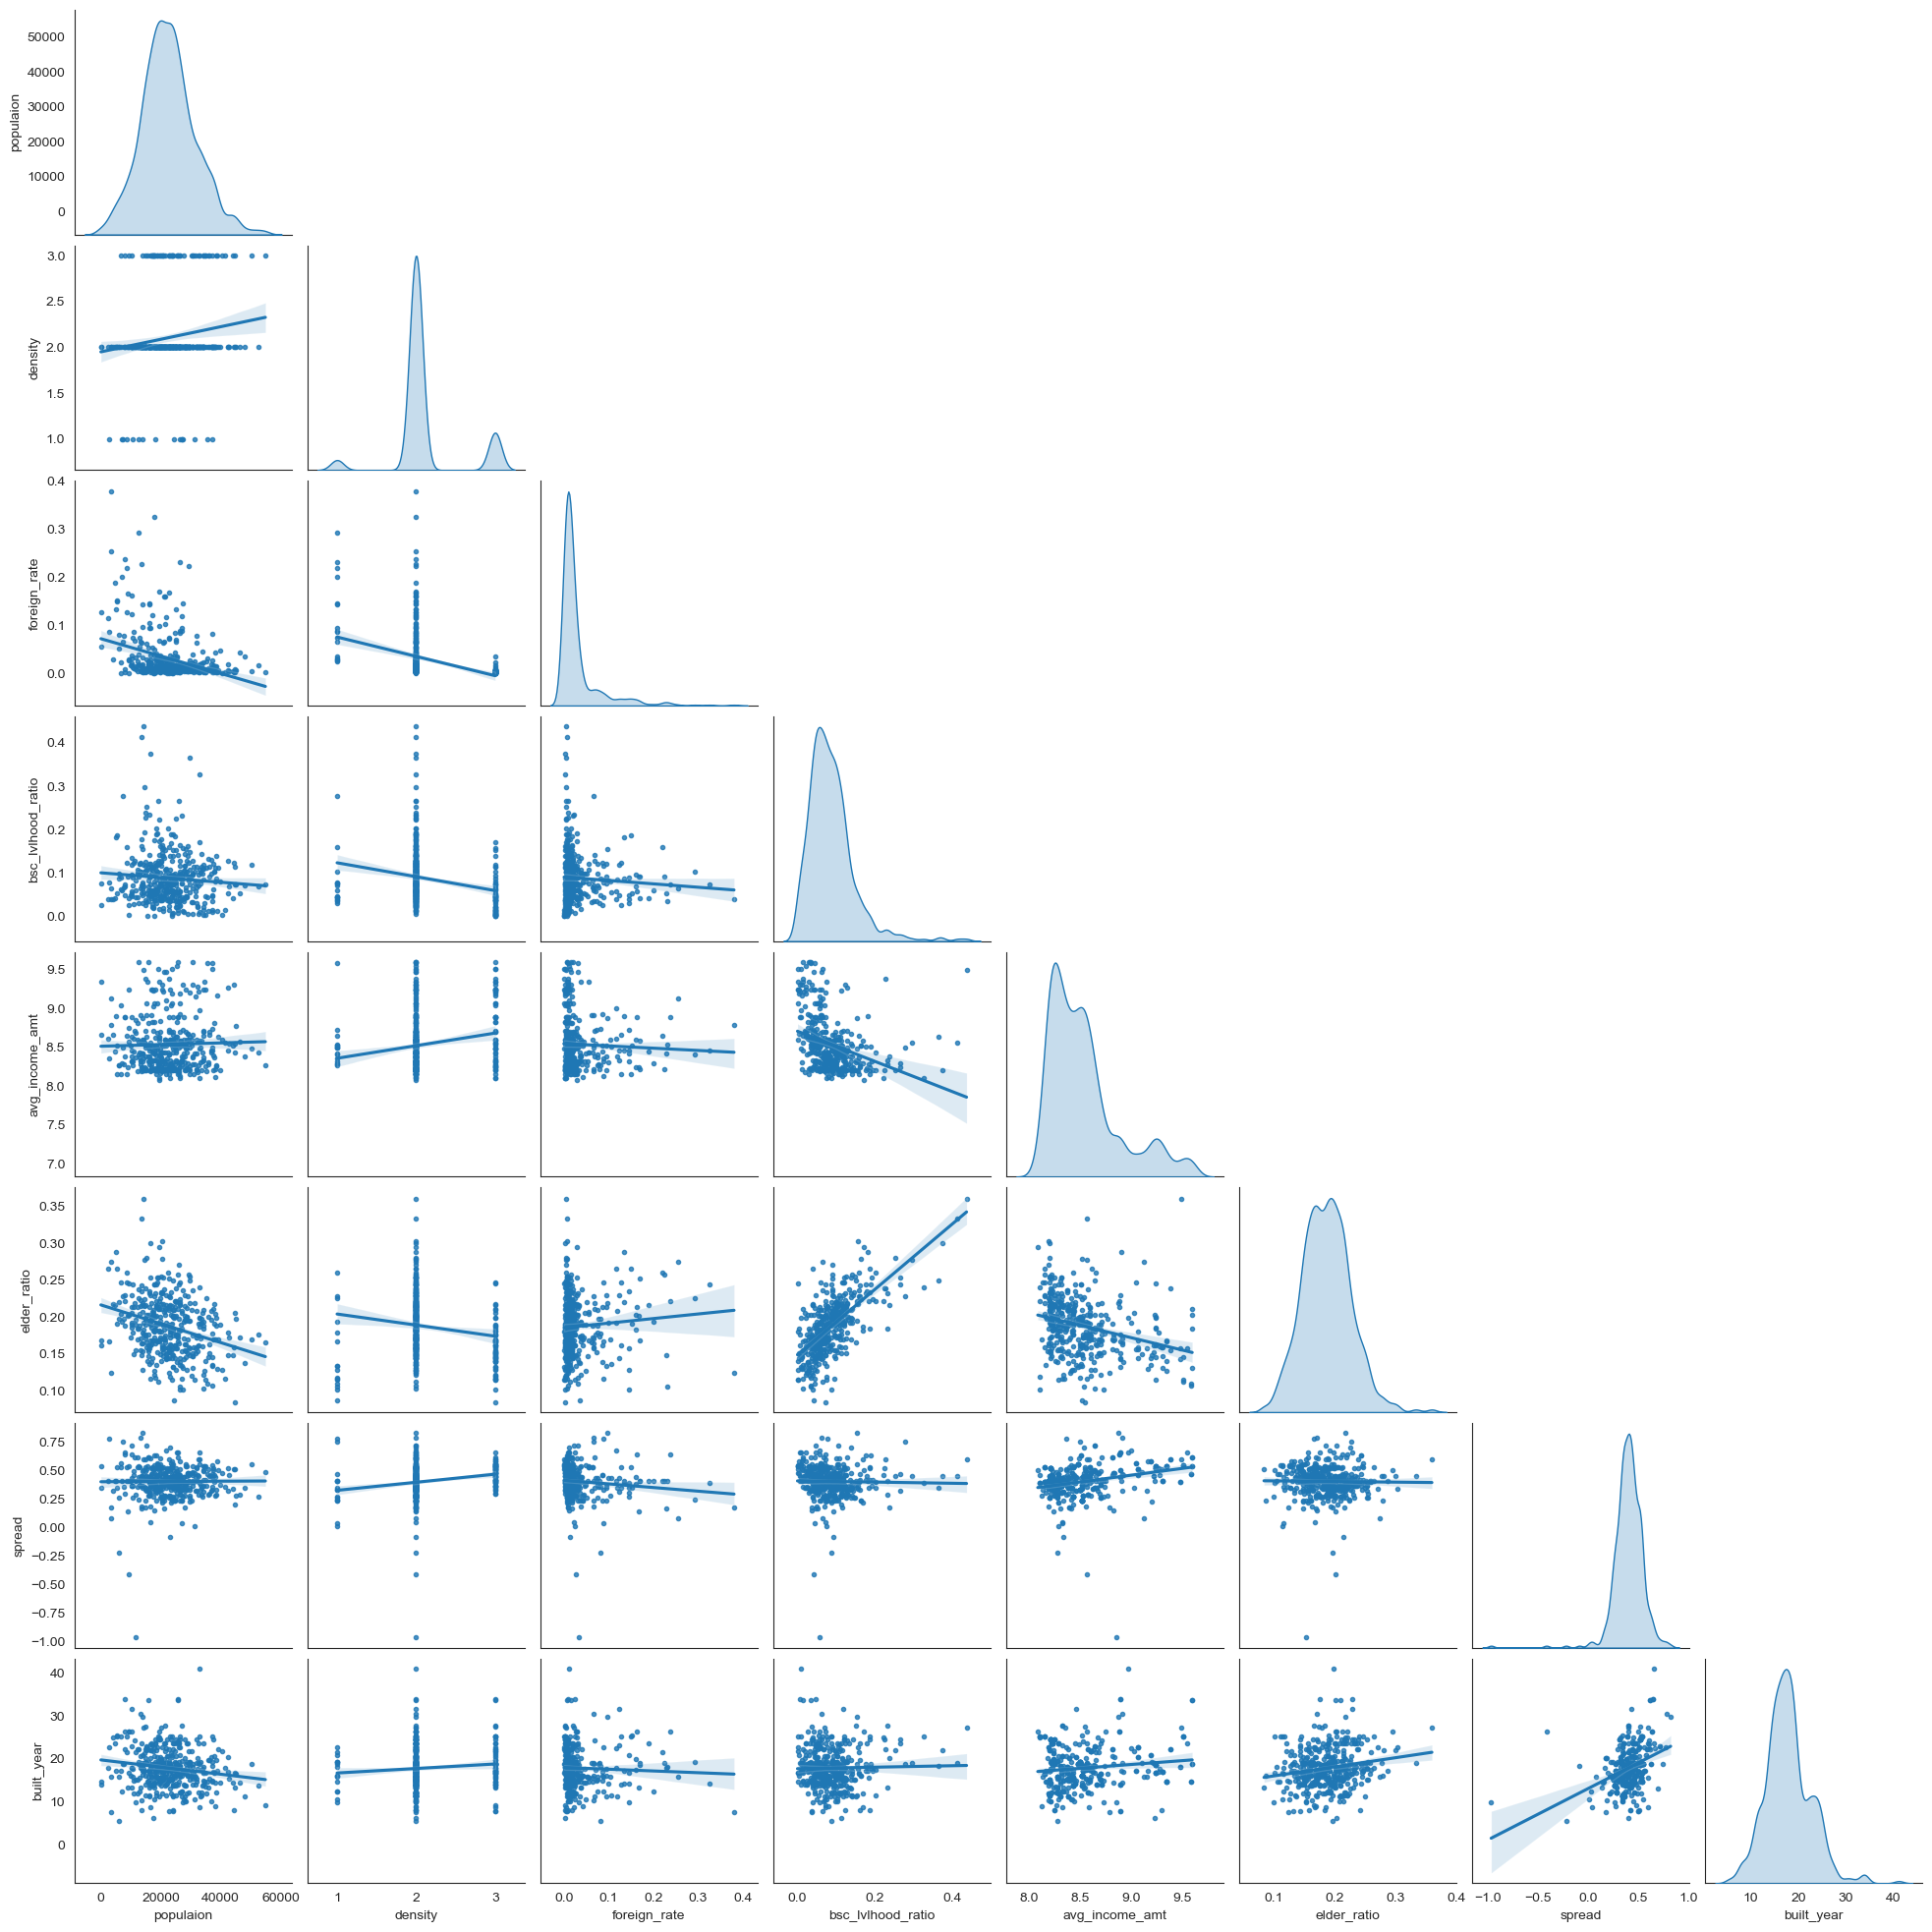

In [6]:
sns.set_style('white')
def myPairPlot(data : pd.DataFrame) -> plt.plot :
    graph = sns.pairplot(data, 
                         diag_kind = "kde", 
                         markers = ".", 
                         kind = "reg", 
                         diag_kws = {'bw_method': 0.2})
    for i, j in zip(*plt.np.triu_indices_from(graph.axes, 1)) :
        graph.axes[i, j].set_visible(False)
    return

myPairPlot(matrix.iloc[:,:-1])

#### MultiCollinearity Handling

기초생활수급비율 - 평균소득의 관계

Text(0, 0.5, 'Average Income')

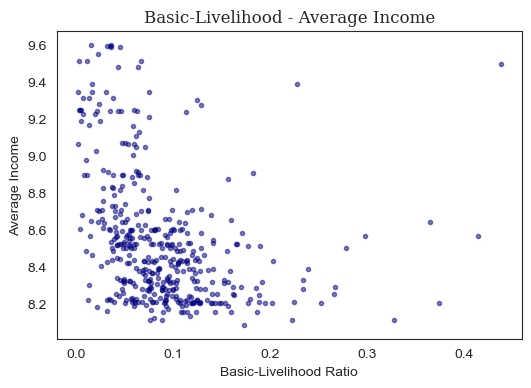

In [7]:
plt.figure(figsize = (6, 4))
plt.scatter(matrix.iloc[:,[3]], matrix.iloc[:,[4]], marker = '.', color = 'navy', alpha = 0.5)
plt.grid(False)
plt.title('Basic-Livelihood - Average Income', fontsize = 12, fontfamily = 'Serif')
plt.xlabel('Basic-Livelihood Ratio')
plt.ylabel('Average Income')

In [8]:
import statsmodels.api as sm

X = sm.add_constant(matrix.iloc[:,[3]])
model = sm.OLS(matrix.iloc[:,[4]], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         avg_income_amt   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     53.41
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.39e-12
Time:                        12:24:16   Log-Likelihood:                -127.85
No. Observations:                 420   AIC:                             259.7
Df Residuals:                     418   BIC:                             267.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.7106      0.02

In [9]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(matrix.iloc[:,[3, 4]])

print(f"Chi Square Stats: {chi2}")
print(f"p-value: {p}")
print(f"degree of Freedom: {dof}")

Chi Square Stats: 17.39918727269516
p-value: 1.0
degree of Freedom: 419


In [10]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_regression(matrix.iloc[:,[3]], matrix.iloc[:,[4]])

print(f"Mutual information: {mi[0]}")

Mutual information: 0.16741973747456118


/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


기초생활수급비율 - 노령인구비율 관계

Text(0, 0.5, 'Elder Population')

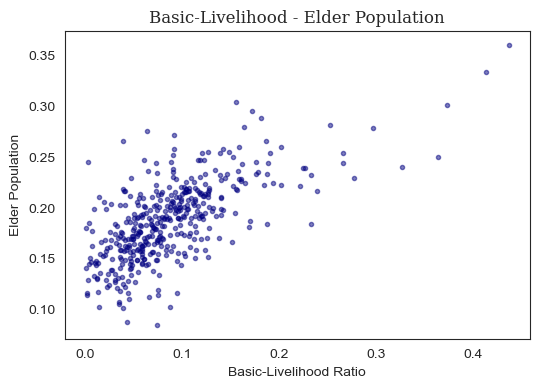

In [11]:
plt.figure(figsize = (6, 4))
plt.scatter(matrix.iloc[:,[3]], matrix.iloc[:,[5]], marker = '.', color = 'navy', alpha = 0.5)
plt.grid(False)
plt.title('Basic-Livelihood - Elder Population', fontsize = 12, fontfamily = 'Serif')
plt.xlabel('Basic-Livelihood Ratio')
plt.ylabel('Elder Population')

In [12]:
X = sm.add_constant(matrix.iloc[:,[3]])
model = sm.OLS(matrix.iloc[:,[5]], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            elder_ratio   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     342.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.76e-56
Time:                        12:24:19   Log-Likelihood:                 883.03
No. Observations:                 420   AIC:                            -1762.
Df Residuals:                     418   BIC:                            -1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1481      0.00

In [13]:
chi2, p, dof, expected = chi2_contingency(matrix.iloc[:,[3, 5]])

print(f"Chi Square Stats: {chi2}")
print(f"p-value: {p}")
print(f"degree of Freedom: {dof}")

Chi Square Stats: 6.392498816072933
p-value: 1.0
degree of Freedom: 419


In [14]:
mi = mutual_info_regression(matrix.iloc[:,[3]], matrix.iloc[:,[5]])
print(f"Mutual information: {mi[0]}")

Mutual information: 0.2647828378819579


/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Modeling

- RandomForest
- Support Vector Machine
- CatBoosting

In [15]:
matrix

,populaion,density,foreign_rate,bsc_lvlhood_ratio,avg_income_amt,elder_ratio,spread,built_year,label
종로구사직동,9362.0,2.0,0.029160,0.027352,8.753692,0.203605,0.402121,26.422436,1.0
종로구삼청동,2576.0,2.0,0.116071,0.039929,8.612424,0.265542,0.402121,17.832706,0.0
종로구부암동,9377.0,2.0,0.028261,0.042151,8.567173,0.202824,-0.416352,26.440842,1.0
종로구평창동,17658.0,2.0,0.010307,0.019975,9.026260,0.205252,0.341060,21.872493,0.0
종로구무악동,8015.0,3.0,0.003868,0.068439,8.381916,0.187718,0.289968,22.173438,1.0
...,...,...,...,...,...,...,...,...,...
강동구성내3동,22882.0,2.0,0.014116,0.066591,8.701282,0.189747,0.258689,15.127471,0.0
강동구둔촌1동,70.0,2.0,0.128571,0.026316,8.658970,0.161290,0.346600,13.904708,0.0
강동구둔촌2동,24169.0,2.0,0.004593,0.051893,8.658970,0.184433,0.346600,13.904708,0.0
강동구길동,45142.0,2.0,0.007399,0.074541,8.771733,0.198042,0.277597,16.627392,1.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

matrix = matrix.astype('float')
X_train, X_test, y_train, y_test = train_test_split(matrix.iloc[:,:-1], matrix.iloc[:,-1], test_size = 0.2, random_state = 42)

RandomForest Classifier

In [17]:
randomforest = RandomForestClassifier(n_estimators = 1000, 
                                      random_state = 42,
                                      class_weight = 'balanced_subsample',
                                      ccp_alpha = 0.02,
                                      criterion = 'entropy')
randomforest_fit = randomforest.fit(X_train, y_train)

In [18]:
randomforest_y_pred = randomforest.predict(X_test)
accuracy = accuracy_score(y_test, randomforest_y_pred)

In [19]:
randomforest_report = classification_report(y_test, randomforest_y_pred, target_names = ['no renewal',' renewal'])
print(randomforest_report)

              precision    recall  f1-score   support

  no renewal       0.80      0.80      0.80        51
     renewal       0.70      0.70      0.70        33

    accuracy                           0.76        84
   macro avg       0.75      0.75      0.75        84
weighted avg       0.76      0.76      0.76        84


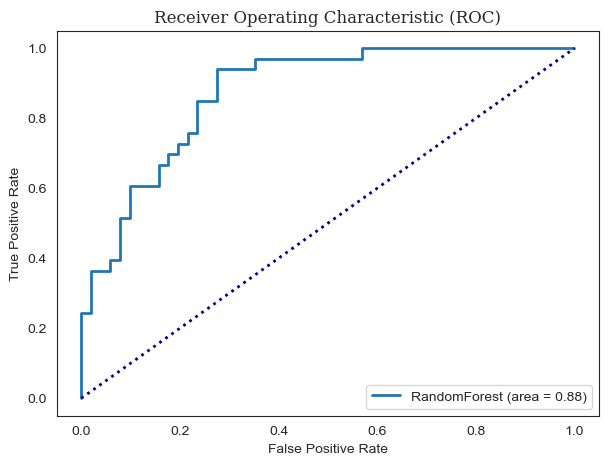

In [20]:
randomforest_y_probs = randomforest.predict_proba(X_test)[:, 1]
randomforest_fpr, randomforest_tpr, thresholds = roc_curve(y_test, randomforest_y_probs)
randomforest_roc_auc = auc(randomforest_fpr, randomforest_tpr)

plt.figure(figsize = (7, 5))
plt.plot(randomforest_fpr, randomforest_tpr, lw = 2, label = 'RandomForest (area = %0.2f)' % randomforest_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

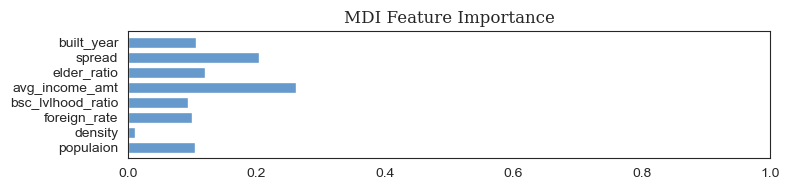

In [21]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                     'Importance': randomforest.feature_importances_})
plt.figure(figsize = (8,2))
plt.barh(feature_importance_df['Feature'], 
         feature_importance_df['Importance'], 
         color = '#6699CC',
         height = 0.7)
plt.grid(False)
plt.xlim([0, 1])
plt.title('MDI Feature Importance', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()

Support Vector Machine

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', 
          gamma = 0.01,
          C = 0.01,
          class_weight = 'balanced',
          decision_function_shape = 'ovo',
          probability = True)
svm_fit = svm.fit(X_train, y_train)

In [26]:
svm_y_pred = svm.predict(X_test)

svm_report = classification_report(y_test, svm_y_pred, target_names = ['no renewal',' renewal'])
print(svm_report)

              precision    recall  f1-score   support

  no renewal       0.70      0.61      0.65        51
     renewal       0.50      0.61      0.55        33

    accuracy                           0.61        84
   macro avg       0.60      0.61      0.60        84
weighted avg       0.62      0.61      0.61        84


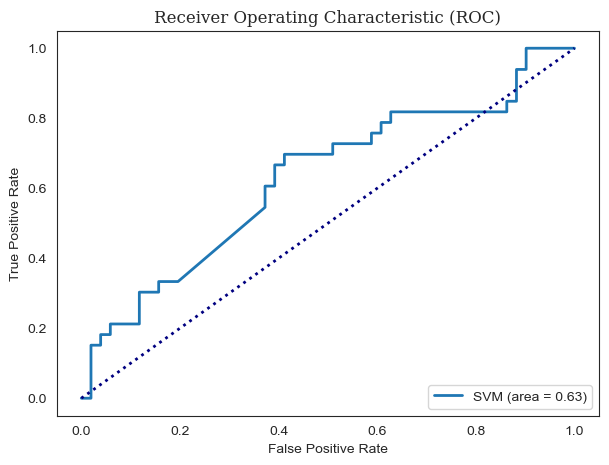

In [27]:
svm_y_probs = svm.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_y_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize = (7, 5))
plt.plot(svm_fpr, svm_tpr, lw = 2, label = 'SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

In [28]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 1000, 
                         depth = 6, 
                         learning_rate = 0.1, 
                         loss_function = 'Logloss', 
                         eval_metric = 'Accuracy', 
                         random_seed = 42,
                         early_stopping_rounds = 200,
                         verbose = False)

cat.fit(X_train, y_train, eval_set = (X_test, y_test), verbose = 0)

y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.76%


In [29]:
cat_y_pred = cat.predict(X_test)

cat_report = classification_report(y_test, cat_y_pred, target_names = ['no renewal',' renewal'])
print(cat_report)

              precision    recall  f1-score   support

  no renewal       0.80      0.88      0.84        51
     renewal       0.79      0.67      0.72        33

    accuracy                           0.80        84
   macro avg       0.79      0.77      0.78        84
weighted avg       0.80      0.80      0.79        84


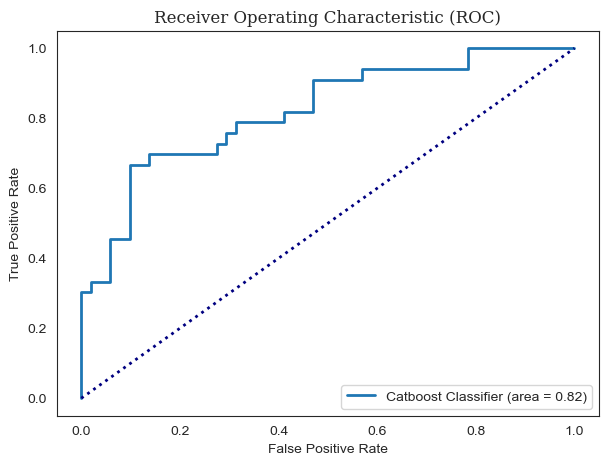

In [30]:
cat_y_probs = cat.predict_proba(X_test)[:, 1]
cat_fpr, cat_tpr, thresholds = roc_curve(y_test, cat_y_probs)
cat_roc_auc = auc(cat_fpr, cat_tpr)

plt.figure(figsize = (7, 5))
plt.plot(cat_fpr, cat_tpr, lw = 2, label = 'Catboost Classifier (area = %0.2f)' % cat_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

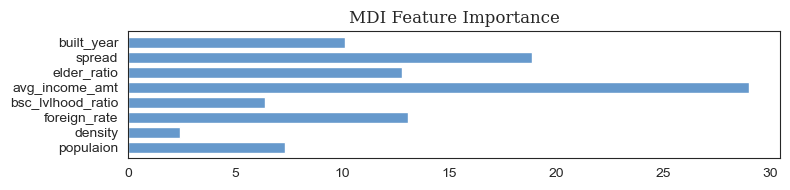

In [31]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                     'Importance': cat.feature_importances_})
plt.figure(figsize = (8,2))
plt.barh(feature_importance_df['Feature'], 
         feature_importance_df['Importance'], 
         color = '#6699CC',
         height = 0.7)
plt.grid(False)
plt.title('MDI Feature Importance', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()

#### Classification Report

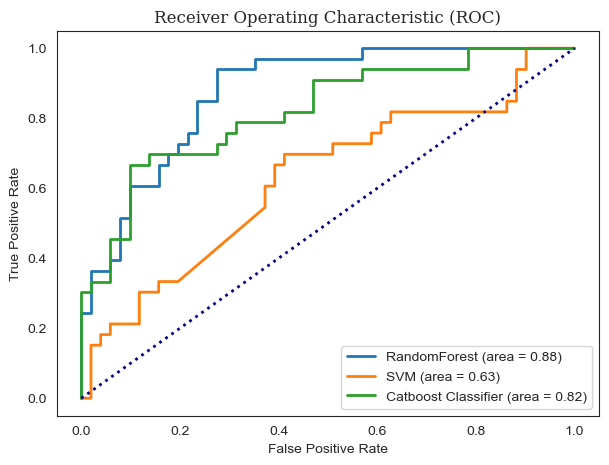

In [32]:
plt.figure(figsize = (7, 5))
plt.plot(randomforest_fpr, randomforest_tpr, lw = 2, label = 'RandomForest (area = %0.2f)' % randomforest_roc_auc)
plt.plot(svm_fpr, svm_tpr, lw = 2, label = 'SVM (area = %0.2f)' % svm_roc_auc)
plt.plot(cat_fpr, cat_tpr, lw = 2, label = 'Catboost Classifier (area = %0.2f)' % cat_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

#### Probability Calibration

RandomForest, SVM, Catboost

In [33]:
from sklearn.calibration import CalibratedClassifierCV

randomforest_cali = CalibratedClassifierCV(estimator = randomforest, 
                                           method = 'isotonic')
randomforest_cali.fit(X_train, y_train)
rf_cali_y_pred = randomforest_cali.predict(X_test)
rf_cali_report = classification_report(y_test, rf_cali_y_pred, target_names = ['no renewal',' renewal'])
print(rf_cali_report)

              precision    recall  f1-score   support

  no renewal       0.78      0.84      0.81        51
     renewal       0.72      0.64      0.68        33

    accuracy                           0.76        84
   macro avg       0.75      0.74      0.74        84
weighted avg       0.76      0.76      0.76        84


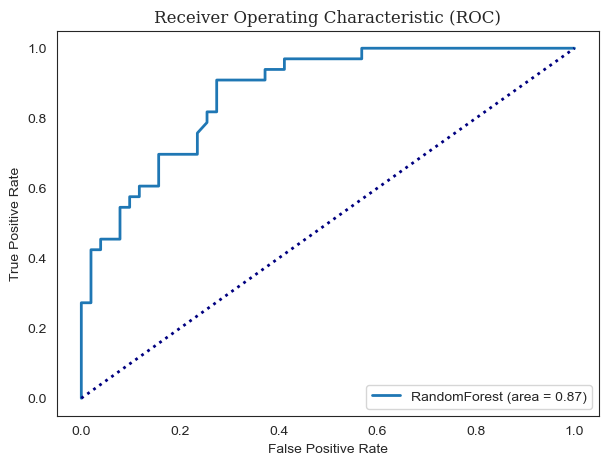

In [34]:
rf_cali_y_probs = randomforest_cali.predict_proba(X_test)[:, 1]
rf_cali_fpr, rf_cali_tpr, thresholds = roc_curve(y_test, rf_cali_y_probs)
rf_cali_roc_auc = auc(rf_cali_fpr, rf_cali_tpr)

plt.figure(figsize = (7, 5))
plt.plot(rf_cali_fpr, rf_cali_tpr, lw = 2, label = 'RandomForest (area = %0.2f)' % rf_cali_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

In [35]:
svm_cali = CalibratedClassifierCV(estimator = svm, method = 'sigmoid')
svm_cali.fit(X_train, y_train)
svm_cali_y_pred = svm_cali.predict(X_test)
svm_cali_report = classification_report(y_test, svm_cali_y_pred, target_names = ['no renewal',' renewal'])
print(svm_cali_report)

              precision    recall  f1-score   support

  no renewal       0.70      0.73      0.71        51
     renewal       0.55      0.52      0.53        33

    accuracy                           0.64        84
   macro avg       0.62      0.62      0.62        84
weighted avg       0.64      0.64      0.64        84


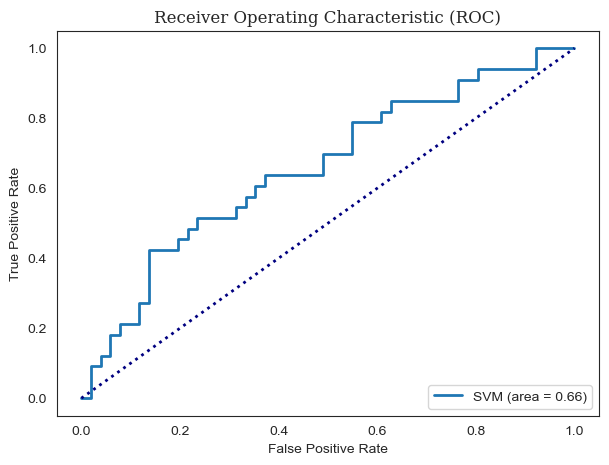

In [36]:
svm_cali_y_probs = svm_cali.predict_proba(X_test)[:, 1]
svm_cali_fpr, svm_cali_tpr, thresholds = roc_curve(y_test, svm_cali_y_probs)
svm_cali_roc_auc = auc(svm_cali_fpr, svm_cali_tpr)

plt.figure(figsize = (7, 5))
plt.plot(svm_cali_fpr, svm_cali_tpr, lw = 2, label = 'SVM (area = %0.2f)' % svm_cali_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

In [37]:
cat_cali = CalibratedClassifierCV(estimator = cat, method = 'isotonic')
cat_cali.fit(X_train, y_train)
cat_cali_y_pred = cat_cali.predict(X_test)
cat_cali_report = classification_report(y_test, cat_cali_y_pred, target_names = ['no renewal',' renewal'])
print(cat_cali_report)

              precision    recall  f1-score   support

  no renewal       0.82      0.78      0.80        51
     renewal       0.69      0.73      0.71        33

    accuracy                           0.76        84
   macro avg       0.75      0.76      0.75        84
weighted avg       0.77      0.76      0.76        84


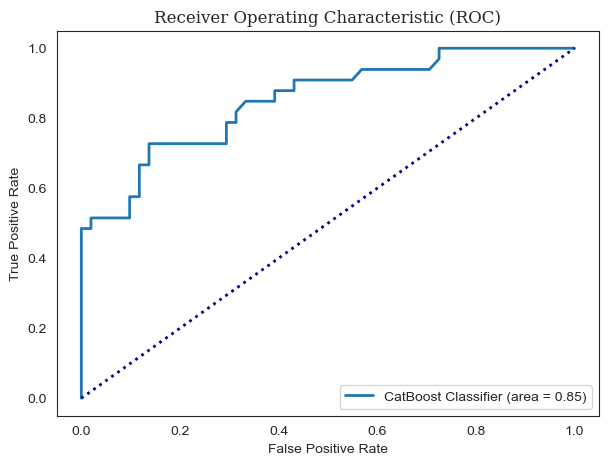

In [38]:
cat_cali_y_probs = cat_cali.predict_proba(X_test)[:, 1]
cat_cali_fpr, cat_cali_tpr, thresholds = roc_curve(y_test, cat_cali_y_probs)
cat_cali_roc_auc = auc(cat_cali_fpr, cat_cali_tpr)

plt.figure(figsize = (7, 5))
plt.plot(cat_cali_fpr, cat_cali_tpr, lw = 2, label = 'CatBoost Classifier (area = %0.2f)' % cat_cali_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

#### Classification Report woth Calibration

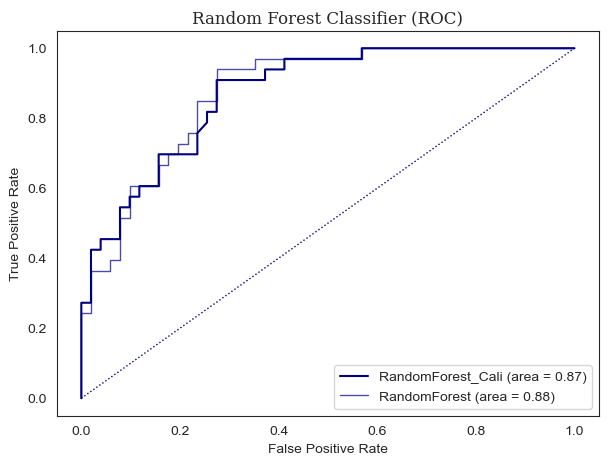

In [39]:
plt.figure(figsize = (7, 5))
plt.plot(rf_cali_fpr, rf_cali_tpr, lw = 1.5, label = 'RandomForest_Cali (area = %0.2f)' % rf_cali_roc_auc, color = 'navy')
plt.plot(randomforest_fpr, randomforest_tpr, lw = 1, label = 'RandomForest (area = %0.2f)' % randomforest_roc_auc, alpha = 0.7, color = 'navy')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

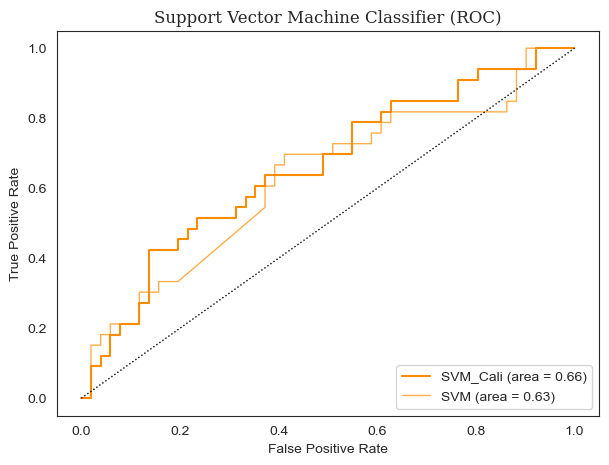

In [40]:
plt.figure(figsize = (7, 5))
plt.plot(svm_cali_fpr, svm_cali_tpr, lw = 1.5, label = 'SVM_Cali (area = %0.2f)' % svm_cali_roc_auc, color = 'darkorange')
plt.plot(svm_fpr, svm_tpr, lw = 1, label = 'SVM (area = %0.2f)' % svm_roc_auc, alpha = 0.7, color = 'darkorange')
plt.plot([0, 1], [0, 1], color = 'k', lw = 1, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Classifier (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

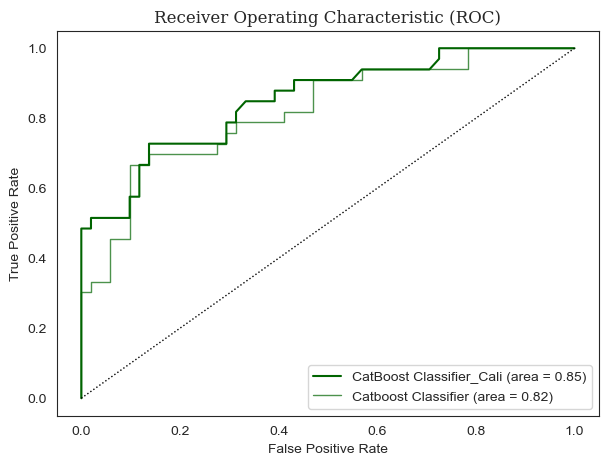

In [41]:
plt.figure(figsize = (7, 5))
plt.plot(cat_cali_fpr, cat_cali_tpr, lw = 1.5, label = 'CatBoost Classifier_Cali (area = %0.2f)' % cat_cali_roc_auc, color = 'darkgreen')
plt.plot(cat_fpr, cat_tpr, lw = 1, label = 'Catboost Classifier (area = %0.2f)' % cat_roc_auc, alpha = 0.7, color = 'darkgreen')
plt.plot([0, 1], [0, 1], color = 'k', lw = 1, linestyle = ':')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()